In [3]:
import os
import pandas as pd
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# download data
!curl https://data.cityofnewyork.us/resource/tpwt-8dyw.csv > Directory_Of_Homeless_Population_By_Year.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1248    0  1248    0     0   7313      0 --:--:-- --:--:-- --:--:--  7341


In [4]:
# test if $PUIDATA is there. If not, create it
if os.getenv("PUIDATA") is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")
else:
    pass
print(os.getenv("PUIDATA"))

/nfshome/lj1230/PUIdata


In [14]:
# move data to PUIdata folder
!mv Directory_Of_Homeless_Population_By_Year.csv $PUIDATA

In [5]:
# show data file
!ls $PUIDATA

Directory_Of_Homeless_Population_By_Year.csv


In [15]:
HP = pd.read_csv(os.getenv("PUIDATA") + '/Directory_Of_Homeless_Population_By_Year.csv')
HP.head(7)

,area,homeless_estimates,year
0,Surface Area - Manhattan,906,2012
1,Total Unsheltered Individuals,3262,2012
2,Subways,1634,2012
3,Surface Total,1628,2012
4,Surface Area - Staten Island,99,2012
5,Surface Area - Queens,86,2012
6,Surface Area - Brooklyn,368,2012


In [16]:
HP_S = HP.drop(['area'], axis=1)
HP_S.head(7)

,homeless_estimates,year
0,906,2012
1,3262,2012
2,1634,2012
3,1628,2012
4,99,2012
5,86,2012
6,368,2012


In [17]:
# it is better to do a filter before scatter the Year & Homeless Estimates data roughly
HP_F = HP[HP['area'].str.contains('Subways')].drop(['area'], axis=1)
HP_F

,homeless_estimates,year
2,1634,2012
14,1275,2011
23,1077,2010
26,968,2009


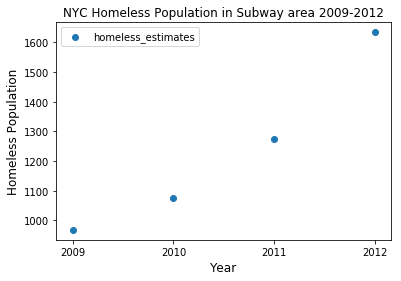

In [18]:
pl.scatter(x=HP_F['year'], y=HP_F['homeless_estimates'])
pl.title('NYC Homeless Population in Subway area 2009-2012')
pl.xlabel('Year', fontsize=12)
plt.xticks([2009, 2010, 2011, 2012])
pl.ylabel('Homeless Population', fontsize=12)
pl.legend()

Figure 1: The scatter plot shows the estimated numnber of homeless population in NYC subway area from 2009 to 2012. From the figure, we can see that this data is increasing year by year, and the growing trend is almost quadratic.